In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Read the data

In [4]:
df = pd.read_csv('polynomial_regression_dataset.csv')

df.head()

,input,target
0,-38.16,1721.36840
1,-17.21,325.61115
2,-8.27,54.33435
3,37.75,2502.12875
4,11.13,-82.54965


## Creating two new columns in the data frame

In [6]:
df['input_squared'] = df['input']**2

df['input_cubed'] = df['input']**3

In [8]:
df.head()

,input,target,input_squared,input_cubed
0,-38.16,1721.36840,1456.1856,-55568.042496
1,-17.21,325.61115,296.1841,-5097.328361
2,-8.27,54.33435,68.3929,-565.609283
3,37.75,2502.12875,1425.0625,53796.109375
4,11.13,-82.54965,123.8769,1378.749897


## Partitioning the data into Training and Test set

In [14]:
X = df[['input', 'input_squared', 'input_cubed']] # store input values in X

y = df['target'] # store target values in y

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1) 

# 70 % training and 30% for testing the model

## Fitting the linear regression model-Linear model

In [17]:
lin_reg_1 = LinearRegression().fit(train_X[['input']], train_y)

In [21]:
print(f"Y = {lin_reg_1.intercept_:.3f} + {lin_reg_1.coef_[0]:.3f}x")

r2_1st_order = lin_reg_1.score(test_X[['input']],test_y)
print(f"Coefficient of Determination: {r2_1st_order:.8f}")

Y = 612.850 + 3.845x
Coefficient of Determination: 0.02812716


## Fitting the linear regression model- 2nd Order equation

In [27]:
lin_reg_2 = LinearRegression().fit(train_X[['input', 'input_squared']], train_y)

print(f"Y = {lin_reg_2.intercept_:.3f} + {lin_reg_2.coef_[0]:.3f}x + {lin_reg_2.coef_[1]:.3f}x^2")

r2_2nd_order = lin_reg_2.score(test_X[['input', 'input_squared']], test_y)

print(f"Coefficient of Determination : {r2_2nd_order:.8f}")

Y = -38.946 + 7.085x + 1.548x^2
Coefficient of Determination : 0.93450669


## Fitting the linear regression model- 3rd Order equation

In [36]:
lin_reg_3 = LinearRegression().fit(train_X[['input', 'input_squared', 'input_cubed']], train_y)

print(f" Y = {lin_reg_3.intercept_:.8f} + {lin_reg_3.coef_[0]:.3f}x + {lin_reg_3.coef_[1]:.3f}x^2 + {lin_reg_3.coef_[2]:.3f}x^3")

r2_3rd_order = lin_reg_3.score(test_X[['input', 'input_squared', 'input_cubed']], test_y)

print(f'Coefficient of Determination: {r2_3rd_order:.8f}')

 Y = -39.00220489 + 6.397x + 1.549x^2 + 0.001x^3
Coefficient of Determination: 0.93471424


## Plot all the three polynomials

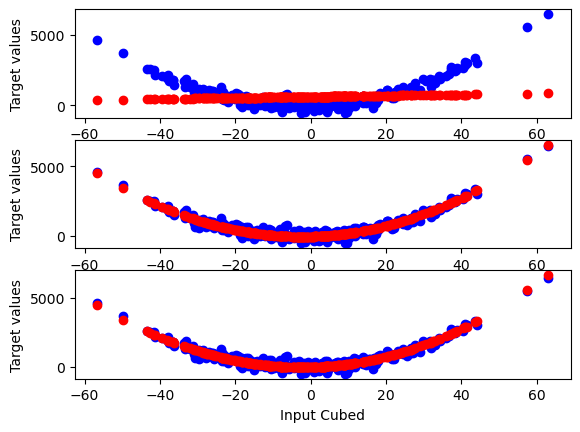

In [43]:
fig,ax = plt.subplots(3)

ax[0].scatter(x = test_X[['input']], y = test_y, color = 'blue')
ax[0].scatter(x = test_X[['input']], y = lin_reg_1.predict(test_X[['input']]), color = 'red')
ax[0].set_xlabel("Original Input")
ax[0].set_ylabel("Target values")

ax[1].scatter(x = test_X[['input']] , y = test_y , color = 'blue')
ax[1].scatter(x = test_X[['input']], y = lin_reg_2.predict(test_X[['input', 'input_squared']]), color = 'red')
ax[1].set_xlabel('Input Squared')
ax[1].set_ylabel('Target values')

ax[2].scatter(x = test_X[['input']] , y = test_y , color = 'blue')
ax[2].scatter(x = test_X[['input']], y = lin_reg_3.predict(test_X[['input', 'input_squared', 'input_cubed']]), color = 'red')
ax[2].set_xlabel('Input Cubed')
ax[2].set_ylabel('Target values')

plt.show()


In [45]:
print(f"{'1st order model':18s}{r2_1st_order:>.8f}")
print(f"{'2nd order model':18s}{r2_2nd_order:>.8f}")
print(f"{'3rd order model':18s}{r2_3rd_order:>.8f}")

1st order model   0.02812716
2nd order model   0.93450669
3rd order model   0.93471424
